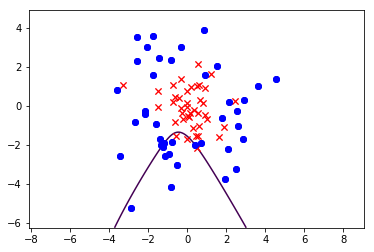

cost 70.964
db[L]:
[[-20.15168]]
dW[L]:
[[-10.83768 -14.77368 -10.53648 -14.54862 -10.92229  -4.67233]]


../mlcomm/nn/utils.py:228: RuntimeWarning: overflow encountered in exp
  y = 1/(1+np.exp(-x))
/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


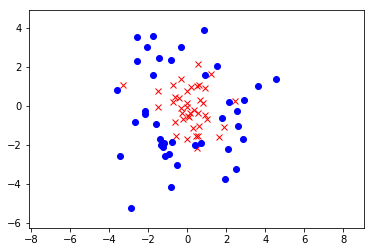

cost inf


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


In [4]:
# -*- coding: utf-8 -*-
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import mlcomm.nn.nnet as nnn
import mlcomm.nn.utils as nnu
from dataset2_nn import DataSet  


#get and plot the data
y_D,x_D = DataSet.get_data()
DataSet.plot_data()


#init params
nn_layers = (2,6,6,1)
nn = nnn.NNet(nn_layers, 'sigmoid', 'sigmoid')

lambd = 0
#Computes cost using the output generated by NN and assumed cost function
def cost():
    ### YOUR CODE HERE ###
    output = nn.output(x_D)
    flag_yeq1 = np.nonzero(y_D == 1)[1]
    flag_yeq0 = np.nonzero(y_D == 0)[1]
    cost = np.sum(-np.log(output[:, flag_yeq1])) + np.sum(-np.log(1 - output[:, flag_yeq0]))
    #cost += lambd * np.sum(nn.W ** 2)
    #####################
    return cost


#plot and show
DataSet.plot_decision_boundary(nn.output)
plt.show()
print('cost %.3f' % cost())



#Function which contains the derivative of the cost function wrt the netowrk
#output. It is essential for the first step in the back-propgation
def dCda_f(y,a):
    dC_da = None
    ### YOUR CODE HERE ###
    dC_da = (a-y)/a/(1-a)
    #flag_yeq1 = np.nonzero(y == 1)[1]
    # flag_yeq0 = np.nonzero(y == 0)[1]
    # dC_da = np.sum(-y[:, flag_yeq1]/a[:, flag_yeq1]) + np.sum((1-y[:, flag_yeq0])/(1-a[:, flag_yeq0]))
    #####################
    return dC_da


#gradient descent
nn.gd_learn(10000, 0.05, y_D, x_D, dCda_f)


#plot and show
DataSet.plot_decision_boundary(nn.output)
plt.show()
print('cost %.3f' % cost())

In [4]:
test = np.array([[1,2],[3,4]])
test ** 2


array([[ 1,  4],
       [ 9, 16]])

In [5]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution.
    size : int or tuple of ints, optional
        Output shap

In [18]:
a = np.array([1,2,3,4,5,6])
print(a.shape)
b = a.reshape(-1,1)
print(b.shape)
c = np.expand_dims(a,axis = 0)
print(c.shape)
c.T

(6,)
(6, 1)
(1, 6)


array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])